# Data Cleaning

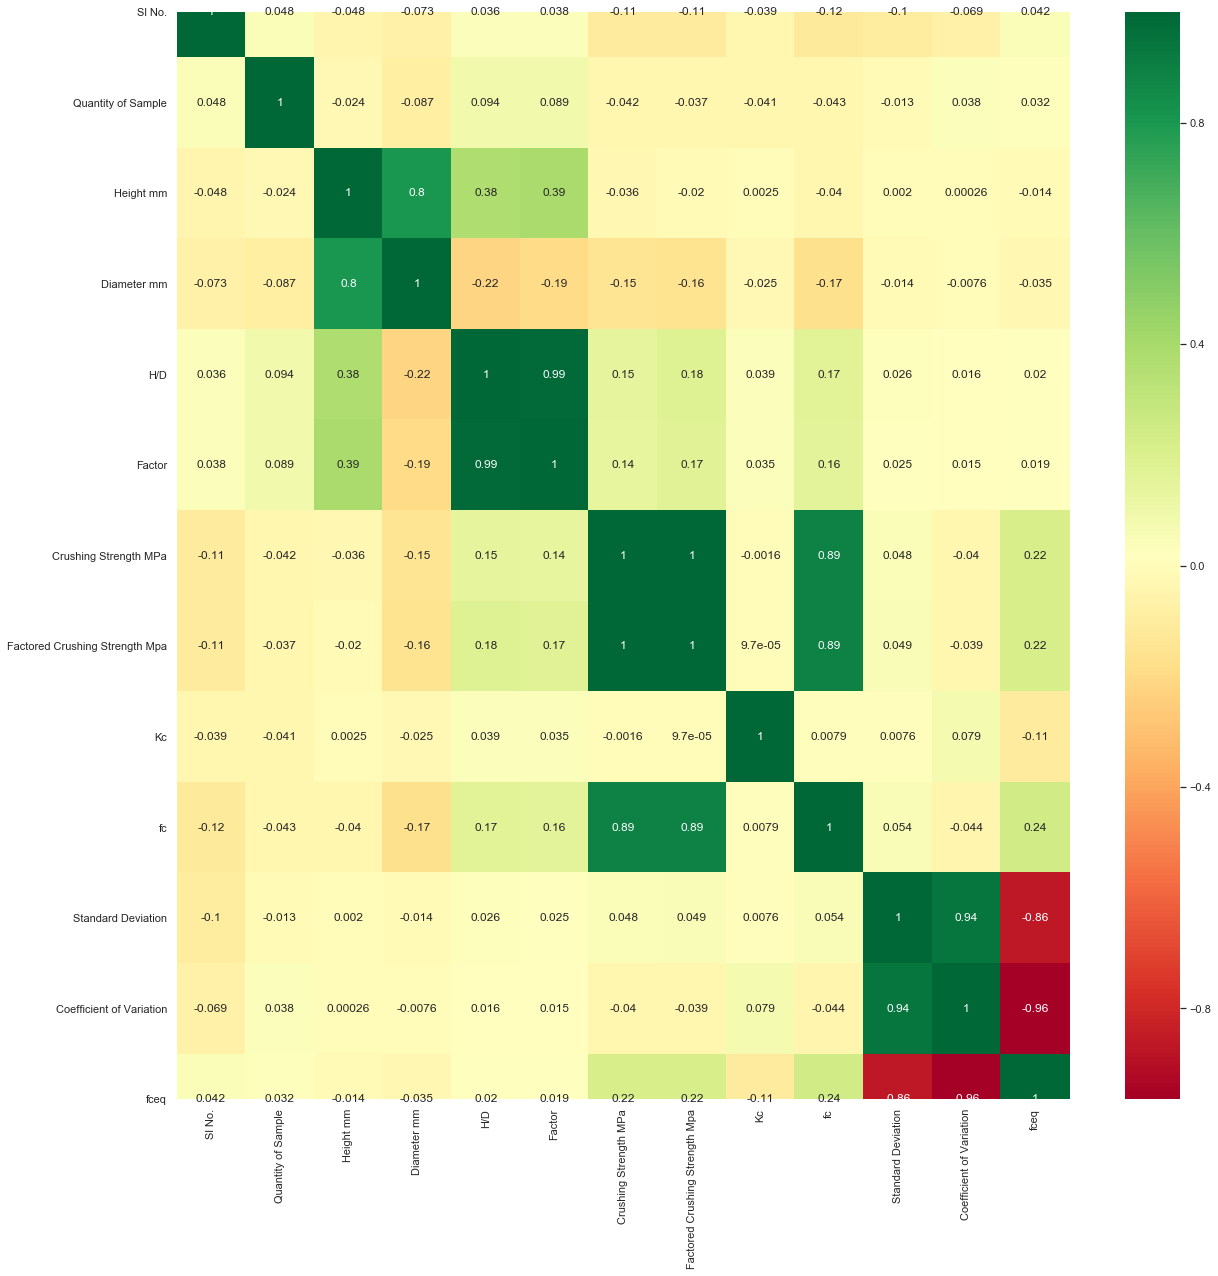

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import math
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_excel('FinalDataClean.xlsx')

df.head()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

#Co-relation matrix visualisation to find out the columns with strong relations
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [2]:
#Taking only the columns that are not strongly related to each other to avoid duplicacy and overfitting


df = df[["Sample Location", "Quantity of Sample","Height mm","Diameter mm", "Fracture Type","fceq","Crushing Strength MPa"]]

df.head()

,Sample Location,Quantity of Sample,Height mm,Diameter mm,Fracture Type,fceq,Crushing Strength MPa
0,B,3,135,69,Shear,16.414129,33.6
1,B,3,136,69,Shear,16.414129,20.7
2,B,3,137,69,Shear,16.414129,23.1
3,C,3,132,69,Columnar,24.235281,30.6
4,C,3,137,69,Columnar,24.235281,27.4


## String manipulation for Uniform Uniques Values on Categorical vairables

In [3]:
# Cleaning for Sample Location
dropList = []

for i, j in enumerate(df['Sample Location']):
    mixed = ( ('B' in j) and ('C' in j) ) or ( ('B' in j) and ('F' in j) ) or ( ('C' in j) and ('F' in j) ) or ( ('B' in j) and ('W' in j) )
    
    if(mixed):
        dropList.append(i)
    elif('B' in j):
        df.loc[i,'Sample Location'] = 'B'
    elif('F' in j):
        df.loc[i,'Sample Location'] = 'F'
    elif( ('Not available' in j) or ('Not Mentioned' in j) ):
        dropList.append(i)

df.drop(index = dropList, axis = 0, inplace = True)

#Cleaning for fracture type
dropListF = []

for i,j in enumerate(df["Fracture Type"]):
    
    if( ("Cone" in j) and ("Shear" in j) ):
        df.loc[i,'Fracture Type'] = "Cone and Shear"
    elif( ("Cone" in j) and ("Split" in j) ):
        df.loc[i,'Fracture Type'] = "Cone and Split"
    elif( ("Shear" in j) or ("SheaR" in j) ):
        df.loc[i,'Fracture Type'] = "Shear"
    elif("Cone" in j):
        df.loc[i,'Fracture Type'] = "Cone"
    elif( ("Columnar" in j) or ("Columner" in j) ):
        df.loc[i,'Fracture Type'] = "Columnar"
    elif( "Combined" in j):
        dropListF.append(i)

df.drop(index = dropListF, axis = 0, inplace = True)


# Preprocessing: Missing data Imputation and Outlier handling

In [4]:

df['Sample Location'].fillna(df['Sample Location'].value_counts().index[0], inplace=True)
df['Fracture Type'].fillna(df['Fracture Type'].value_counts().index[0], inplace=True)

df['Quantity of Sample'].fillna(df['Quantity of Sample'].mean(), inplace=True)
df['Height mm'].fillna(df['Height mm'].mean(), inplace=True)
df['Diameter mm'].fillna(df['Diameter mm'].mean(), inplace=True)
df['Crushing Strength MPa'].fillna(df['Crushing Strength MPa'].mean(), inplace=True)

df.dropna(subset=["fceq"],inplace = True)

print("List of Missing Value Sum:")
print(df.isnull().sum())

#Outliers detection and removal
min_threshold = df['fceq'].quantile(0.01)
outlier1 = df[df['fceq']<min_threshold]
max_threshold = df['fceq'].quantile(0.99)
outlier2 = df[df['fceq']>max_threshold]
df = df[(df['fceq']>min_threshold) & (df['fceq']<max_threshold)]


min_threshold = df['Quantity of Sample'].quantile(0.01)
outlier1 = df[df['Quantity of Sample']<min_threshold]
max_threshold = df['Quantity of Sample'].quantile(0.99)
outlier2 = df[df['Quantity of Sample']>max_threshold]
df = df[(df['Quantity of Sample']>min_threshold) & (df['Quantity of Sample']<max_threshold)]


min_threshold = df['Height mm'].quantile(0.01)
outlier1 = df[df['Height mm']<min_threshold]
max_threshold = df['Height mm'].quantile(0.99)
outlier2 = df[df['Height mm']>max_threshold]
df = df[(df['Height mm']>min_threshold) & (df['Height mm']<max_threshold)]

min_threshold = df['Diameter mm'].quantile(0.01)
outlier1 = df[df['Diameter mm']<min_threshold]
max_threshold = df['Diameter mm'].quantile(0.99)
outlier2 = df[df['Diameter mm']>max_threshold]
df = df[(df['Diameter mm']>min_threshold) & (df['Diameter mm']<max_threshold)]

min_threshold = df['Crushing Strength MPa'].quantile(0.01)
outlier1 = df[df['Crushing Strength MPa']<min_threshold]
max_threshold = df['Crushing Strength MPa'].quantile(0.99)
outlier2 = df[df['Crushing Strength MPa']>max_threshold]
df = df[(df['Crushing Strength MPa']>min_threshold) & (df['Crushing Strength MPa']<max_threshold)]

df = df.reset_index(drop=True)

List of Missing Value Sum:
Sample Location          0
Quantity of Sample       0
Height mm                0
Diameter mm              0
Fracture Type            0
fceq                     0
Crushing Strength MPa    0
dtype: int64


In [5]:
df.head()

,Sample Location,Quantity of Sample,Height mm,Diameter mm,Fracture Type,fceq,Crushing Strength MPa
0,B,3.0,135.0,69.0,Shear,16.414129,33.6
1,B,3.0,136.0,69.0,Shear,16.414129,20.7
2,B,3.0,137.0,69.0,Shear,16.414129,23.1
3,C,3.0,132.0,69.0,Columnar,24.235281,30.6
4,C,3.0,137.0,69.0,Columnar,24.235281,27.4


## Splitting,encoding categorical data and feature scaling

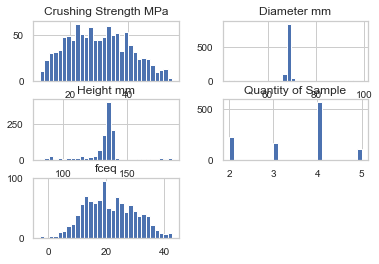

In [6]:
hist = df.hist(xlabelsize=10,ylabelsize=10,bins=30)

In [7]:
#Encoding Categorilcal Variables

features = pd.get_dummies(df["Fracture Type"])
features2 = pd.get_dummies(df["Sample Location"])

del df["Fracture Type"]
del df["Sample Location"]

df = pd.concat([df, features], axis=1)
df = pd.concat([df, features2], axis=1)


df.head()




,Quantity of Sample,Height mm,Diameter mm,fceq,Crushing Strength MPa,Columnar,Cone,Cone and Shear,Cone and Split,Shear,Shear,B,C,F,SS,W
0,3.0,135.0,69.0,16.414129,33.6,0,0,0,0,1,0,1,0,0,0,0
1,3.0,136.0,69.0,16.414129,20.7,0,0,0,0,1,0,1,0,0,0,0
2,3.0,137.0,69.0,16.414129,23.1,0,0,0,0,1,0,1,0,0,0,0
3,3.0,132.0,69.0,24.235281,30.6,1,0,0,0,0,0,0,1,0,0,0
4,3.0,137.0,69.0,24.235281,27.4,1,0,0,0,0,0,0,1,0,0,0


In [8]:
#Splitting to independent and dependant variables
X = df[['Quantity of Sample',"Height mm","Diameter mm",'Columnar','Cone','Cone and Shear',
       'Cone and Split','Shear','B','C','F','SS']]
y = df['Crushing Strength MPa']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression

In [9]:
LinearR2 = cross_val_score(LinearRegression(),X,y,cv=10,scoring='r2').mean() * 100
LinearMAE = cross_val_score(LinearRegression(),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
LinearMSE = cross_val_score(LinearRegression(),X,y,cv=10,scoring='neg_mean_squared_error').mean()
LinearRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:\n")
print("R2 = ","{:.2f}".format(LinearR2),"%")
print("Mean Absolute Error = ",LinearMAE)
print("Mean Squared Error = ",LinearMSE)
print("Root Mean Squared Error = ",LinearRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:

R2 =  -3.96 %
Mean Absolute Error =  -8.761593727981353
Mean Squared Error =  -110.76295292838267
Root Mean Squared Error =  10.524397984131095 



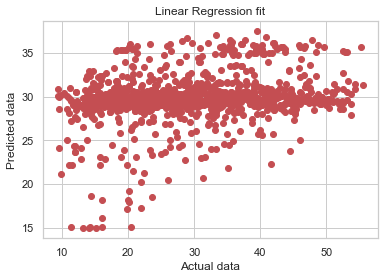

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

reg = linear_model.LinearRegression(normalize=True) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Linear Regression fit')
plt.xlabel('Actual data')
plt.show()

In [11]:
correlated_features = set()
correlation_matrix = X.corr()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features

set()

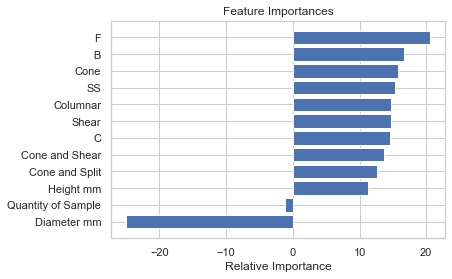

[ -1.10560726  11.2465318  -25.01687559  14.78073118  15.77919721
  13.70956283  12.6926896   14.75800873  16.68154602  14.57457658
  20.58587979  15.33063469]
Intercept: 6.109916667882999
Coefficients: [ -1.10560726  11.2465318  -25.01687559  14.78073118  15.77919721
  13.70956283  12.6926896   14.75800873  16.68154602  14.57457658
  20.58587979  15.33063469]


In [12]:
#Set is empty so No Attributes in Dataset are strongly co-related

features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# Ridge Regression

In [13]:
RidgeR2 = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='r2').mean() * 100
RidgeMAE = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
RidgeMSE = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='neg_mean_squared_error').mean()
RidgeRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:\n")
print("R2 = ","{:.2f}".format(RidgeR2),"%")
print("Mean Absolute Error = ",RidgeMAE)
print("Mean Squared Error = ",RidgeMSE)
print("Root Mean Squared Error = ",RidgeRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:

R2 =  -3.93 %
Mean Absolute Error =  -8.758588623844295
Mean Squared Error =  -110.74009964837235
Root Mean Squared Error =  10.524397984131095 



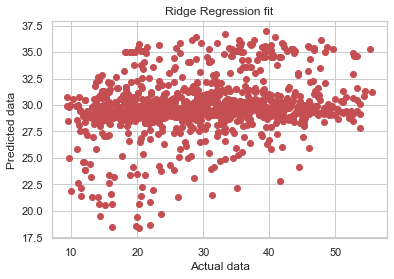

In [14]:
reg = linear_model.Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)

plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Ridge Regression fit')
plt.xlabel('Actual data')
plt.show()

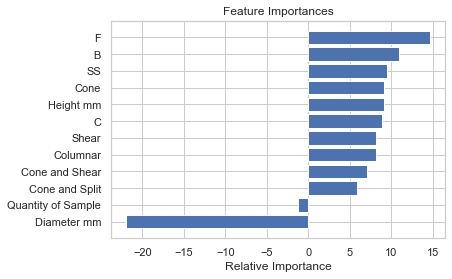

[ -1.19395886   9.12092005 -21.97731535   8.15827628   9.16995104
   7.1010834    5.8739691    8.19601917  10.97189366   8.90138438
  14.66947294   9.49423232]
Intercept: 18.06036261063263
Coefficients: [ -1.19395886   9.12092005 -21.97731535   8.15827628   9.16995104
   7.1010834    5.8739691    8.19601917  10.97189366   8.90138438
  14.66947294   9.49423232]


In [15]:
features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# Lasso Regression

In [16]:
LassoR2 = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='r2').mean() * 100
LassoMAE = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
LassoMSE = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='neg_mean_squared_error').mean()
LassoRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:\n")
print("R2 = ","{:.2f}".format(LassoR2),"%")
print("Mean Absolute Error = ",LassoMAE)
print("Mean Squared Error = ",LassoMSE)
print("Root Mean Squared Error = ",LassoRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:

R2 =  -3.93 %
Mean Absolute Error =  -8.760333749110746
Mean Squared Error =  -110.72309466230683
Root Mean Squared Error =  10.524397984131095 



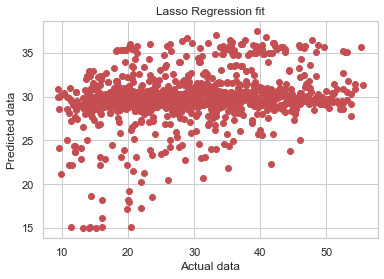

In [17]:
reg = linear_model.Lasso(alpha = 0.00001) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Lasso Regression fit')
plt.xlabel('Actual data')
plt.show()

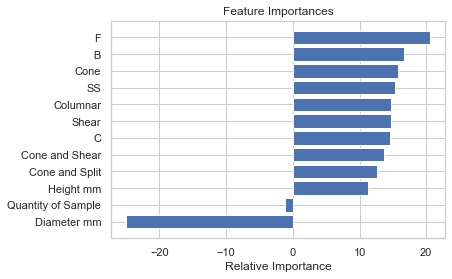

[ -1.10567347  11.24390689 -25.01353473  14.76560712  15.764079
  13.69441656  12.67700099  14.74297016  16.67269989  14.56574622
  20.57679732  15.32156474]
Intercept: 6.1335761946813925
Coefficients: [ -1.10567347  11.24390689 -25.01353473  14.76560712  15.764079
  13.69441656  12.67700099  14.74297016  16.67269989  14.56574622
  20.57679732  15.32156474]


In [18]:
features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# K-Nearest Neighbours

In [19]:
KNR2 = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='r2').mean() * 100
KNMAE = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
KNMSE = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='neg_mean_squared_error').mean()
KNRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:\n")
print("R2 = ","{:.2f}".format(KNR2),"%")
print("Mean Absolute Error = ",KNMAE)
print("Mean Squared Error = ",KNMSE)
print("Root Mean Squared Error = ",KNRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:

R2 =  -39.15 %
Mean Absolute Error =  -9.845325621235093
Mean Squared Error =  -145.95970572177765
Root Mean Squared Error =  10.524397984131095 



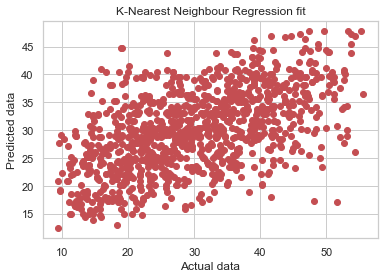

In [20]:
reg = KNeighborsRegressor(n_neighbors=3) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('K-Nearest Neighbour Regression fit')
plt.xlabel('Actual data')
plt.show()

# Decision Tree Regression

In [21]:
DesR2 = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='r2').mean() * 100
DesMAE = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
DesMSE = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='neg_mean_squared_error').mean()
DesRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:\n")
print("R2 = ","{:.2f}".format(DesR2),"%")
print("Mean Absolute Error = ",DesMAE)
print("Mean Squared Error = ",DesMSE)
print("Root Mean Squared Error = ",DesRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:

R2 =  -67.11 %
Mean Absolute Error =  -10.725694019656407
Mean Squared Error =  -173.03658480857388
Root Mean Squared Error =  10.524397984131095 



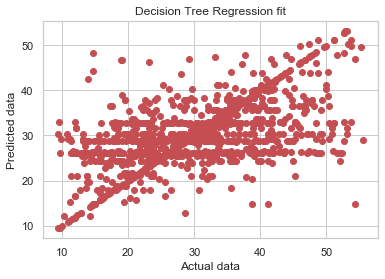

In [22]:
reg = DecisionTreeRegressor(max_depth=12,random_state = 0)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Decision Tree Regression fit')
plt.xlabel('Actual data')
plt.show()

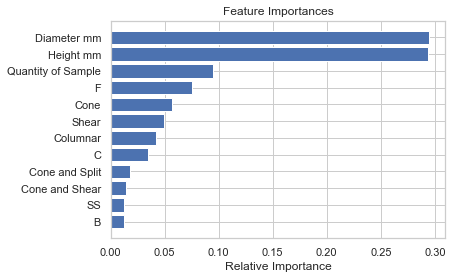

[0.09478685 0.29409878 0.29506957 0.04221802 0.05715088 0.01423735
 0.01801865 0.04902766 0.01215734 0.03500589 0.07556284 0.01266616]


In [23]:
features = list(X.columns.values)
importances = reg.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

# Random Forest Regression

In [24]:
RfR2 = cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 0),X,y,cv=10,scoring='r2').mean() * 100
RfMAE = cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 0),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
RfMSE = cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 0),X,y,cv=10,scoring='neg_mean_squared_error').mean()
RfRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:\n")
print("R2 = ","{:.2f}".format(RfR2),"%")
print("Mean Absolute Error = ",RfMAE)
print("Mean Squared Error = ",RfMSE)
print("Root Mean Squared Error = ",RfRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:

R2 =  -38.90 %
Mean Absolute Error =  -9.83677332875585
Mean Squared Error =  -145.6417936200383
Root Mean Squared Error =  10.524397984131095 



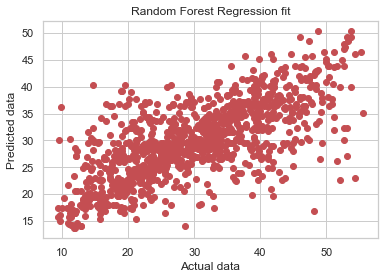

In [25]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Random Forest Regression fit')
plt.xlabel('Actual data')
plt.show()

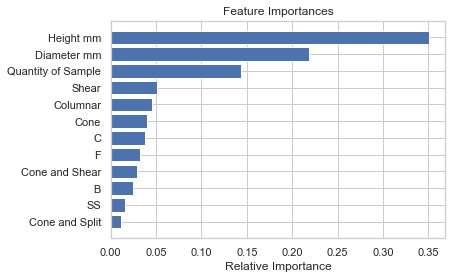

[0.14326918 0.35108372 0.21879217 0.04549174 0.0399308  0.02920327
 0.01112617 0.05082616 0.02457442 0.03752886 0.03250325 0.01567025]


In [26]:
features = list(X.columns.values)
importances = reg.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

# Support Vector Regression

In [27]:
SvR2 = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='r2').mean() * 100
SvMAE = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
SvMSE = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='neg_mean_squared_error').mean()
SvRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:\n")
print("R2 = ","{:.2f}".format(SvR2),"%")
print("Mean Absolute Error = ",SvMAE)
print("Mean Squared Error = ",SvMSE)
print("Root Mean Squared Error = ",SvRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:

R2 =  -5.25 %
Mean Absolute Error =  -8.79131411394021
Mean Squared Error =  -111.87847507033783
Root Mean Squared Error =  10.524397984131095 



In [ ]:
reg = SVR(kernel='linear', C=21)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Random Forest Regression fit')
plt.xlabel('Actual data')
plt.show()

# XGBoost Regression

In [49]:
XGR2 = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='r2').mean() * 100
XGMAE = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
XGMSE = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='neg_mean_squared_error').mean()
XGRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:\n")
print("R2 = ","{:.2f}".format(XGR2),"%")
print("Mean Absolute Error = ",XGMAE)
print("Mean Squared Error = ",XGMSE)
print("Root Mean Squared Error = ",XGRMSE,'\n')

[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:06:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


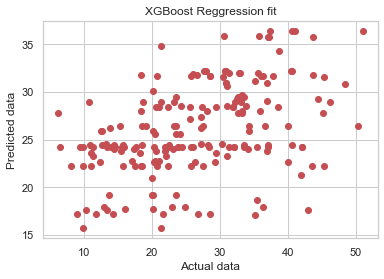

In [50]:
reg = xgb.XGBRegressor()
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('XGBoost Reggression fit')
plt.xlabel('Actual data')
plt.show()

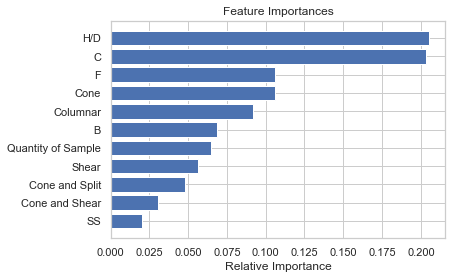

[0.06461438 0.20554483 0.09156422 0.10574419 0.03053088 0.04775761
 0.05657944 0.06856719 0.20312887 0.10578197 0.02018648]


In [51]:
features = list(X.columns.values)
importances = reg.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)